# **Punto 1 del taller**

# Importar librerias necesarias y montar la data

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib import cm

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

In [12]:
from google.colab import drive

drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Colab Notebooks/IA/RegresionLineal_2_variables/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/IA/RegresionLineal_2_variables


# Cargar data

In [13]:
data = np.loadtxt("datos2.txt",delimiter=',',skiprows=0,usecols=[0,1,2],dtype='float')
dataSize = data.shape
print('Tamaño de data:',dataSize)

Tamaño de data: (47, 3)


# Normalizar la data cargada (X1, X2 y Y)

In [14]:
promX = np.mean(data, axis=0)
stdX = np.std(data, axis=0)

print('promX:', promX)
print('stdX:', stdX)

dataNormalizada = np.zeros((dataSize[0], dataSize[1]))
for i in range(dataSize[0]):
    for j in range(3):
        dataNormalizada[i, j] = (data[i, j] - promX[j]) / stdX[j]

promX: [  3000.68085106   1003.17021277 341412.76595745]
stdX: [7.86202619e+02 7.52842809e-01 1.23702548e+05]


# Graficar la data normalizada

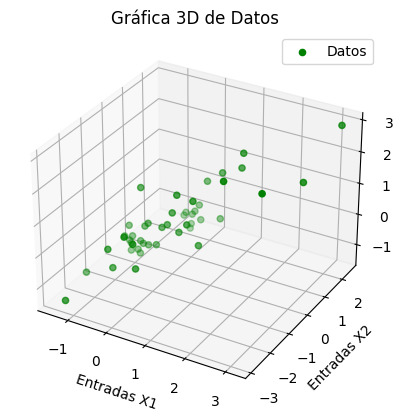

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en 3D
ax.scatter(dataNormalizada[:,0], dataNormalizada[:,1], dataNormalizada[:,2], c='g', marker='o', label='Datos')

# Personalizar el gráfico
ax.set_xlabel('Entradas X1')
ax.set_ylabel('Entradas X2')
ax.set_zlabel('Salida Y')
ax.set_title('Gráfica 3D de Datos')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

# Inicializar los Beta, crear X y Y

In [18]:
Beta = np.zeros((3,1)) # Beta es un vector de 3 filas 1 columna, almacenará a B0 y B1
onesVector = np.ones((dataSize[0],)) # Crea un vector de unos del tamaño de datazise[0]

# Crea la matriz X concatenando onesvector con data[:,0] ==> [:,0] significa todas las filas de la columna 0
X = np.column_stack((onesVector,dataNormalizada[:,0],dataNormalizada[:,1]))

# Crea un vector de 0's de m filas y 1 columna
y=np.zeros((dataSize[0],1))

# Se asignan las salidas al vector y
y[:,0] = dataNormalizada[:,2]

# Función Gradiente Descendente

In [7]:
def Gradiente(Beta,alpha,m,X,y,numIter,J):
  betaTemp = np.zeros((3,1))
  h_beta = np.zeros((m,1))
  betaPrint = np.zeros((numIter,3))

  for i in range(numIter):
    h_beta = np.dot(X,Beta)
    for j in range(3): # Con J=0 se calcula B0 y con J=1 se calcula B1
      temp1 = (np.reshape(X[:,j],(m,1)))

      #Creo temp_diff solo para guardar la resta entre hipotesis y y
      temp_diff = np.subtract(h_beta, y)

      # En temp2 reemplazo la parte correspondiente a la resta po la variable temp_diff
      temp2 = np.sum(np. multiply(temp1,temp_diff))

      betaTemp[j,0] = Beta[j,0] - (temp2*(alpha/m))
      betaPrint[i,j] = betaTemp[j,0]

    Beta = betaTemp
    h_beta = np.dot(X,Beta)
    # Cost hace la sumatoria de los cuadrados de temp_diff
    J[i]  = np.sum(np.square(temp_diff)) / (2 * m)

  return (Beta, J, betaPrint, h_beta)


# Ejecución de la función Gradiente con su respectiva gráfica de Cost y los Beta

Beta0:  [-2.45689993e-16]
Beta1:  [0.832902]
Beta2:  [-0.001635]


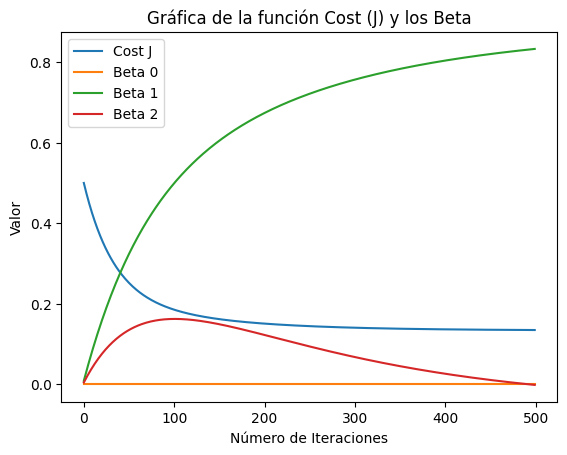

In [26]:
alpha = 0.01
numIter = 500
m = dataSize[0] # Cantidad de datos de entrenamiento
J = np.zeros((numIter,1))
Beta = np.zeros((3,1))

Beta, J, betaPrint, h_beta = Gradiente(Beta,alpha,m,X,y,numIter,J)
print('Beta0: ', Beta[0])
print('Beta1: ', Beta[1])
print('Beta2: ', Beta[2])

plt.plot(J,'-', label='Cost J')
plt.plot(betaPrint[:, 0],'-', label='Beta 0')
plt.plot(betaPrint[:, 1],'-', label='Beta 1')
plt.plot(betaPrint[:, 2],'-', label='Beta 2')

# Agrega etiquetas a los ejes
plt.xlabel('Número de Iteraciones')
plt.ylabel('Valor')
plt.title('Gráfica de la función Cost (J) y los Beta')

# Agrega una leyenda
plt.legend()

# Muestra el gráfico
plt.show()


# Gráfica en 3D

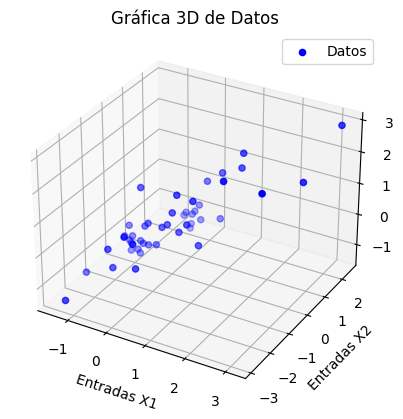

In [25]:
# Crear una figura y un objeto de subtrama 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en 3D
ax.scatter(dataNormalizada[:,0], dataNormalizada[:,1], dataNormalizada[:,2], c='b', marker='o', label='Datos')



# # Definir valores para la línea recta
# X1 = np.zeros((X[:, 1].size, 1))
# X2 = np.zeros((X[:, 2].size, 1))

# X1[:, 0] = X[:, 1]
# X2[:, 0] = X[:, 2]

# # Graficar la línea recta
# ax.plot(X1, h_beta, color='r', label='Línea Recta')


# Personalizar el gráfico
ax.set_xlabel('Entradas X1')
ax.set_ylabel('Entradas X2')
ax.set_zlabel('Salida Y')
ax.set_title('Gráfica 3D de Datos')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

In [23]:
# Crear el trazo de la línea 3D
trace = go.Scatter3d(
    x = dataNormalizada[:,0],
    y = dataNormalizada[:,1],
    z = dataNormalizada[:,2],
    mode = 'markers',
    marker = dict(size = 5),
    line = dict(width = 3)
)

# Definir el diseño del gráfico
layout = go.Layout(
    title = 'X1, X2 vs h',
    width = 800,  # Ancho de la gráfica en píxeles
    height = 600,  # Alto de la gráfica en píxeles
    scene = dict(
        xaxis = dict(title = 'X1'),
        yaxis = dict(title = 'X2'),
        zaxis = dict(title = 'h')
    )
)

# Crear la figura
fig = go.Figure(data=[trace], layout=layout)

# Mostrar el gráfico interactivo en el navegador
fig.show()
